In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
* * *                            MTB PROJECT                                      * * *

Objective: What is the goal of the project?

    The goal of this project is to determine the cities, states, and countries with the best Mountain
    
    Bike Trails.
    

       * * *                                                                           * * *
        
        


Data Analysis is a process of inspecting, cleansing, transforming
and modeling data to discover useful information, informing conclusions 
and supporting decision-making.



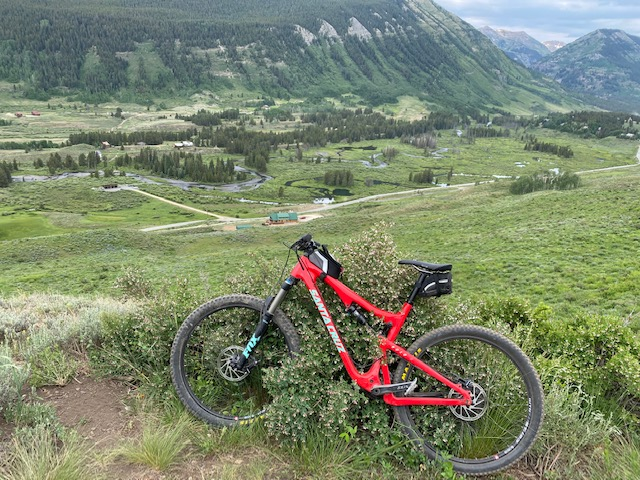



                                    About the Dataset


    The datasets are scraped from mtbproject.com website.  Using python, I collected mountain bike trails in the United States, and the second dataset contains trails internationally.
    
Data Wrangling
One of most important steps of Data Analysis is Data Wrangling. There are three steps:

Data Gathering: Sometimes we need to collect the datasets from different sources such as different APIs, through web-scraping and from different databases. In this project, two mtb datasets are scraped from mtbproject.com.

Accessing Data: 
We try to understand the data - how many types of data are present(datatype), whether any data is missing or not.

Cleaning Data: After accessing the data, a lot of time is spent cleaning the data. Check for missing data, imputation - the process of replacing missing data with substituted values(mean, median, mode). If the data has incorrect datatype, we change it to a correct one. And finally, the columns not required for analysis are removed.



In [3]:
### import the data using pandas

df = pd.read_csv(r'C:\Users\patri\mtb_project_scrape.csv')

In [4]:
### look at the first 5 rows of the data

df.head()

,name_name,name_url,name_miles,name_miles_url,name_elevation_gain,name_elevation_gain_url,name_elevation_down,name_elevation_down_url,name_location,name_location_url,name_level,name_level_url
0,The Whole Enchilada,https://www.mtbproject.com/trail/4670265/the-w...,34.1 mi,https://www.mtbproject.com/trail/4670265/the-w...,"1,283' Up",https://www.mtbproject.com/trail/4670265/the-w...,"7,794' Down",https://www.mtbproject.com/trail/4670265/the-w...,"Moab, UT",https://www.mtbproject.com/trail/4670265/the-w...,Difficult,https://www.mtbproject.com/trail/4670265/the-w...
1,Gooseberry Mesa - The Big Loop,https://www.mtbproject.com/trail/4183760/goose...,13.1 mi,https://www.mtbproject.com/trail/4183760/goose...,554' Up,https://www.mtbproject.com/trail/4183760/goose...,553' Down,https://www.mtbproject.com/trail/4183760/goose...,"Hurricane, UT",https://www.mtbproject.com/trail/4183760/goose...,Difficult,https://www.mtbproject.com/trail/4183760/goose...
2,Little Scraggy Trail Loop,https://www.mtbproject.com/trail/7015764/littl...,12.6 mi,https://www.mtbproject.com/trail/7015764/littl...,"1,432' Up",https://www.mtbproject.com/trail/7015764/littl...,"1,443' Down",https://www.mtbproject.com/trail/7015764/littl...,"Pine, CO",https://www.mtbproject.com/trail/7015764/littl...,Intermediate/Difficult,https://www.mtbproject.com/trail/7015764/littl...
3,Monarch Crest - IMBA EPIC,https://www.mtbproject.com/trail/3671983/monar...,36.2 mi,https://www.mtbproject.com/trail/3671983/monar...,"2,035' Up",https://www.mtbproject.com/trail/3671983/monar...,"5,890' Down",https://www.mtbproject.com/trail/3671983/monar...,"Whitepine, CO",https://www.mtbproject.com/trail/3671983/monar...,Difficult,https://www.mtbproject.com/trail/3671983/monar...
4,Porcupine Rim,https://www.mtbproject.com/trail/157369/porcup...,14.7 mi,https://www.mtbproject.com/trail/157369/porcup...,"1,195' Up",https://www.mtbproject.com/trail/157369/porcup...,"2,962' Down",https://www.mtbproject.com/trail/157369/porcup...,"Moab, UT",https://www.mtbproject.com/trail/157369/porcup...,Difficult,https://www.mtbproject.com/trail/157369/porcup...


In [5]:
### list of the columns in the original dataset

df.columns

Index(['name_name', 'name_url', 'name_miles', 'name_miles_url',
       'name_elevation_gain', 'name_elevation_gain_url', 'name_elevation_down',
       'name_elevation_down_url', 'name_location', 'name_location_url',
       'name_level', 'name_level_url'],
      dtype='object')

In [6]:
### dropping the columns with urls 

data = df.drop(columns=['name_url', 'name_miles_url', 'name_elevation_gain_url', 'name_elevation_down_url',
                        'name_location_url','name_level_url'])
data.head()

,name_name,name_miles,name_elevation_gain,name_elevation_down,name_location,name_level
0,The Whole Enchilada,34.1 mi,"1,283' Up","7,794' Down","Moab, UT",Difficult
1,Gooseberry Mesa - The Big Loop,13.1 mi,554' Up,553' Down,"Hurricane, UT",Difficult
2,Little Scraggy Trail Loop,12.6 mi,"1,432' Up","1,443' Down","Pine, CO",Intermediate/Difficult
3,Monarch Crest - IMBA EPIC,36.2 mi,"2,035' Up","5,890' Down","Whitepine, CO",Difficult
4,Porcupine Rim,14.7 mi,"1,195' Up","2,962' Down","Moab, UT",Difficult


In [7]:
### renaming the columns

mtb = data.rename(columns = {'name_name':'trail_name','name_miles':'trail_length',
                             'name_elevation_gain':'trail_gain_elevation','name_elevation_gain':'trail_drop_elevation',
                             'name_location':'trail_location','name_level':'trail_skill_level'})



**Cleaning the data(Data Wrangling and Preprocessing):


    1. First, I split "trail_location" into 2 new columns - CITY column and STATE column
    
    
    2. Then, I use a lambda function to remove "mi" from trail_length column
    
    
    3. Next, I remove commas and apostrophes with replace function 
    
    
    4. Finally, I remove "up" & "down"  from 'elevation_gain & 'elevation_down' columns with the replace function
    
    

In [8]:
# cleaning data

mtb[['trail_city','trail_state']] = mtb.trail_location.str.split(',',expand=True)

mtb['trail_length'] = mtb['trail_length'].map(lambda x: x.lstrip('').rstrip('mi'))

mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace("'","")
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace(",","")
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace("Up","")
mtb['name_elevation_down'] = mtb['name_elevation_down'].str.replace("' Down","")
mtb['name_elevation_down'] = mtb['name_elevation_down'].str.replace(",","")

mtb.head(15)

,trail_name,trail_length,trail_drop_elevation,name_elevation_down,trail_location,trail_skill_level,trail_city,trail_state
0,The Whole Enchilada,34.1,1283,7794,"Moab, UT",Difficult,Moab,UT
1,Gooseberry Mesa - The Big Loop,13.1,554,553,"Hurricane, UT",Difficult,Hurricane,UT
2,Little Scraggy Trail Loop,12.6,1432,1443,"Pine, CO",Intermediate/Difficult,Pine,CO
3,Monarch Crest - IMBA EPIC,36.2,2035,5890,"Whitepine, CO",Difficult,Whitepine,CO
4,Porcupine Rim,14.7,1195,2962,"Moab, UT",Difficult,Moab,UT
5,Camp Tamarancho Loop,10.8,1407,1406,"Fairfax, CA",Difficult,Fairfax,CA
6,Phil's World,26.8,2059,2061,"Cortez, CO",Intermediate,Cortez,CO
7,Navajo Rocks Loop,17.5,1342,1336,"Moab, UT",Intermediate/Difficult,Moab,UT
8,401 Trail Loop,14.1,2249,2222,"Crested…, CO",Intermediate/Difficult,Crested…,CO
9,White Rim Trail,100.8,5656,5636,"Moab, UT",Intermediate,Moab,UT


In [9]:
### renaming ONE more column

mtb = mtb.rename(columns = {'name_elevation_down':'trail_elevation_gain'})

mtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trail_name            300 non-null    object
 1   trail_length          300 non-null    object
 2   trail_drop_elevation  300 non-null    object
 3   trail_elevation_gain  300 non-null    object
 4   trail_location        300 non-null    object
 5   trail_skill_level     300 non-null    object
 6   trail_city            300 non-null    object
 7   trail_state           300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [10]:

### notice above - all the data types are objects -
### I will change three columns "trail_length" , "trail_drop_elevation" , and "trail_elevation_gain" 
### to INT and FLOAT dtypes.  

# Why change the data types? - to do analysis on integer/float columns


mtb = mtb.astype({"trail_length":'float64', "trail_drop_elevation":'int64',"trail_elevation_gain":'int64'}) 

mtb.dtypes

trail_name               object
trail_length            float64
trail_drop_elevation      int64
trail_elevation_gain      int64
trail_location           object
trail_skill_level        object
trail_city               object
trail_state              object
dtype: object


Second dataset - import the data and clean it



In [11]:
### import the data using pandas

country = pd.read_csv(r'C:\Users\patri\mtb_countrytrails_scrape.csv')
country.head()

,country_name,country_url,country_recommended_route,country_recommended_route_url,country_number_trails,country_number_trails_url
0,Alberta,https://www.mtbproject.com/directory/8006683/a...,11 Recommended Routes,https://www.mtbproject.com/directory/8006683/a...,118 Trails,https://www.mtbproject.com/directory/8006683/a...
1,Argentina,https://www.mtbproject.com/directory/8012049/a...,1 Recommended Route,https://www.mtbproject.com/directory/8012049/a...,14 Trails,https://www.mtbproject.com/directory/8012049/a...
2,Armenia,https://www.mtbproject.com/directory/8019235/a...,14 Recommended Routes,https://www.mtbproject.com/directory/8019235/a...,42 Trails,https://www.mtbproject.com/directory/8019235/a...
3,Australia,https://www.mtbproject.com/directory/8011180/a...,5 Recommended Routes,https://www.mtbproject.com/directory/8011180/a...,141 Trails,https://www.mtbproject.com/directory/8011180/a...
4,Austria,https://www.mtbproject.com/directory/8012099/a...,2 Recommended Routes,https://www.mtbproject.com/directory/8012099/a...,21 Trails,https://www.mtbproject.com/directory/8012099/a...


In [12]:
### dropping the url columns

country_data = country.drop(columns=['country_url', 'country_recommended_route_url', 'country_number_trails_url'])
country_data.head()

,country_name,country_recommended_route,country_number_trails
0,Alberta,11 Recommended Routes,118 Trails
1,Argentina,1 Recommended Route,14 Trails
2,Armenia,14 Recommended Routes,42 Trails
3,Australia,5 Recommended Routes,141 Trails
4,Austria,2 Recommended Routes,21 Trails


In [13]:
### renaming columns

country_df = country_data.rename(columns = {'country_name':'country','country_recommended_route':'recommended_trails',
                                            'country_number_trails':'number_of_trails'})


**Clean the new data set:


    1. First, I remove "Recommended Routes" & "Recommended Route" using the replace function.
    
    2. Lastly, I remove "Trails" & "Trail" using the replace function.
    
    

In [14]:
country_df['recommended_trails'] = country_df['recommended_trails'].str.replace("Recommended Routes","")
country_df['recommended_trails'] = country_df['recommended_trails'].str.replace("Recommended Route","")

In [15]:
country_df['number_of_trails'] = country_df['number_of_trails'].str.replace("Trails","")
country_df['number_of_trails'] = country_df['number_of_trails'].str.replace("Trail","")

In [16]:
country_df.head()

,country,recommended_trails,number_of_trails
0,Alberta,11,118
1,Argentina,1,14
2,Armenia,14,42
3,Australia,5,141
4,Austria,2,21


In [17]:
### notice all columns have the Dtype - object

country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             92 non-null     object
 1   recommended_trails  92 non-null     object
 2   number_of_trails    92 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [18]:
### changing the dtypes of "recommended_trails" & "number_of_trails" to INT

countrys_df = country_df.astype({"recommended_trails":'int64', "number_of_trails":'int64'}) 
countrys_df.dtypes

country               object
recommended_trails     int64
number_of_trails       int64
dtype: object



**Add new column: 'percent_trails_recommeded'
    
    What steps did I take to add the new column??
    
          'percent_trails_recommeded' = ('recommended_trails' / 'number_of_trails') * 100 
    
**Reason to add a new column? 

    The goal is to find countries with the highest quality trails. 
    
             **higher percentage of recommended trails = better riding**




In [19]:

countrys_df['percent_trails_recommeded'] = (countrys_df['recommended_trails'] / countrys_df['number_of_trails']) *100
countrys_df.head()

,country,recommended_trails,number_of_trails,percent_trails_recommeded
0,Alberta,11,118,9.322034
1,Argentina,1,14,7.142857
2,Armenia,14,42,33.333333
3,Australia,5,141,3.546099
4,Austria,2,21,9.523810




**Here I use the round function on "percent_trails_recommeded" column - I want to "clean it up" 

       Below: notice the change from 6 decimals to 3
       



In [20]:
countrys_df['percent_trails_recommeded'] = round(countrys_df['percent_trails_recommeded'],3)
countrys_df.head()

,country,recommended_trails,number_of_trails,percent_trails_recommeded
0,Alberta,11,118,9.322
1,Argentina,1,14,7.143
2,Armenia,14,42,33.333
3,Australia,5,141,3.546
4,Austria,2,21,9.524


Add a column:
    
    'diff_in_elevation' (difference in elevation) = trail_elevation_gain - trail_drop_elevation
    
Why do this?

    To find the most difficult trails to ride!


In [21]:
mtb['diff_in_elevation'] = mtb['trail_elevation_gain'] - mtb['trail_drop_elevation']

In [22]:
###  statistics of countrys_df data (international)

countrys_df.describe()

,recommended_trails,number_of_trails,percent_trails_recommeded
count,92.000000,92.000000,91.000
mean,5.695652,55.086957,inf
std,9.624533,117.266265,NaN
min,0.000000,0.000000,0.000
25%,0.000000,3.000000,0.000
50%,1.500000,10.500000,9.524
75%,6.000000,29.500000,27.922
max,47.000000,572.000000,inf


In [23]:
### notice a problem in the new column - 1 missing result

countrys_df.isnull().sum()

country                      0
recommended_trails           0
number_of_trails             0
percent_trails_recommeded    1
dtype: int64

In [24]:
###  statistics of mtb data (US)

mtb.describe()

,trail_length,trail_drop_elevation,trail_elevation_gain,diff_in_elevation
count,300.000000,300.000000,300.000000,300.000000
mean,15.568333,1516.043333,1655.733333,139.690000
std,32.980688,4172.907188,4167.405678,751.832571
min,1.900000,44.000000,49.000000,-1453.000000
25%,8.475000,664.500000,690.250000,-2.000000
50%,11.500000,1070.000000,1101.000000,0.000000
75%,16.125000,1630.750000,1715.250000,3.000000
max,549.300000,71117.000000,69664.000000,6511.000000


                                  
                        Exploratory Data Analysis
        
       EDA is an approach of analyzing data sets to summarize their main characteristics,
            often using statistical graphics and other data visualization methods
        
        

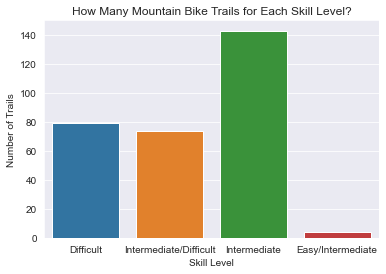

In [25]:
### US DATA - plot trail_skill_level with seaborn
### mostly difficult and intermediate trails 

sns.set_style('darkgrid')

sns.countplot(data=mtb,x='trail_skill_level')

plt.title('How Many Mountain Bike Trails for Each Skill Level?')
plt.xlabel('Skill Level')
plt.ylabel('Number of Trails')

plt.show()

The bar graph shows we're dealing with difficult and intermediate trails!

In [26]:
### group the data and count the states with the most trails

state_count = mtb.groupby(['trail_state'])['trail_name'].count().sort_values(ascending=False).reset_index()


In [27]:
### save the top 10 states in df

top_10_state = state_count[:10]

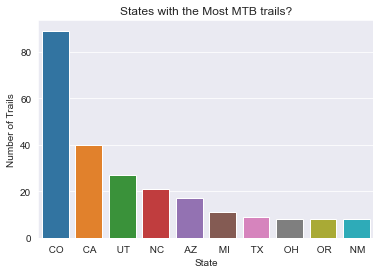

In [28]:
### plot the new dataframe with seaborn
### colorado, california, utah, north carolina, and arizona with the most trails 

sns.barplot(data=top_10_state,x='trail_state',y='trail_name')

plt.title('States with the Most MTB trails?')
plt.xlabel('State')
plt.ylabel('Number of Trails')

plt.show()

Colorado clearly has the most trails!

In [29]:
### What states have the most by miles?
### notice a change - arizona with more miles than north carolina - oregon also makes a jump

trail_length = mtb.groupby(['trail_state'])['trail_length'].sum().sort_values(ascending=False).reset_index()
trail_length.head(15)

,trail_state,trail_length
0,CO,1824.6
1,CA,519.4
2,UT,448.8
3,AZ,285.3
4,NC,266.6
5,OR,117.5
6,MI,116.4
7,TX,112.8
8,GA,110.0
9,NM,97.0


In [30]:
### save into dataframe to plot results

top_6_length = trail_length[:6]

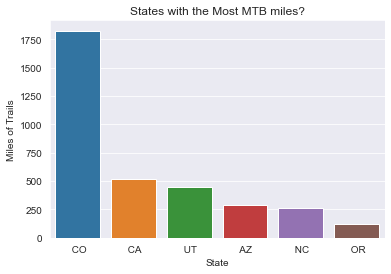

In [31]:
### plot the results

sns.barplot(data=top_6_length,x='trail_state',y='trail_length')

plt.title('States with the Most MTB miles?')
plt.xlabel('State')
plt.ylabel('Miles of Trails')

plt.show()

Colorado has over 1800 miles of trails!  3x the amount of 2nd place California!

Colorado looks to be a great destination for Riders!

In [51]:
## save file to csv - to use in tableau

mtb.to_csv('mtb.csv') 

In [52]:
## save file to csv - tableau

countrys_df.to_csv('mtb_country.csv') 

The tree map below was created in Tableau.  It shows the top 10 cities with the most
trails!

Scroll mouse over the city to see the count number.

Moab - 13 trails

Crested Butte - 6 trails

Pine - 6 trails

In [55]:
%%HTML
<div class='tableauPlaceholder' id='viz1639500755882' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='us_cities_count_trails&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1639500755882');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Conclusions: 
    Do we have a clear understanding of the data?
    Have we found the states with the most trails?
    Have we found cities with the most trails?
    Does the information show a MTB rider where to go for the best mtb trip?